# Project Description
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.


We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.


Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.


Additionally, measure the AUC-ROC metric and compare it with the F1.

# Importing libraries and functions

In [20]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sidetable as stb
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# A. Downloading and preparing the data

## reading the csv file


In [7]:
try:
    
    path='C:\\Users\\aviv\\Downloads\\Churn.csv'
    data = pd.read_csv(path)
    print(data.head())

    
except:
    path = '/datasets/Churn.csv'
    data = pd.read_csv(path)
    print(data.head())
    

    

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


## examining the balance of classes

In [10]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

so we have either 1 for did exit or 0 for didn't. also looks like most people do not exit the bank. our target variable is unbalanced.


In [11]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

the geography column isn't numerical but i think we should take it into account ( get it? account? we're working with a bank? never mind.. )
same for gender column, let's check it for balance too

In [12]:
data.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

pretty balanced, mostly male but not by much

# Preprocessing

In [13]:
data.stb.missing(style=True)

since we can't know exactly the missing tenure values, and it's only 10% missing, i'll drop these rows

converting floats to int type to save space

In [14]:
data.drop(data[data['Tenure'].isna()].index, inplace = True)
data = data.astype({"Tenure":"int","Balance":"int", "EstimatedSalary":"int"})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        9091 non-null   int64 
 1   CustomerId       9091 non-null   int64 
 2   Surname          9091 non-null   object
 3   CreditScore      9091 non-null   int64 
 4   Geography        9091 non-null   object
 5   Gender           9091 non-null   object
 6   Age              9091 non-null   int64 
 7   Tenure           9091 non-null   int64 
 8   Balance          9091 non-null   int64 
 9   NumOfProducts    9091 non-null   int64 
 10  HasCrCard        9091 non-null   int64 
 11  IsActiveMember   9091 non-null   int64 
 12  EstimatedSalary  9091 non-null   int64 
 13  Exited           9091 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 1.0+ MB


let's drop all the other columns which don't give us any value.

In [15]:
data.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace = True)
#data.drop("CustomerId", axis=1, inplace = True)
#data.drop("Surname", axis=1, inplace = True)

In [16]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,101348,1
1,608,Spain,Female,41,1,83807,1,0,1,112542,0
2,502,France,Female,42,8,159660,3,1,0,113931,1
3,699,France,Female,39,1,0,2,0,0,93826,0
4,850,Spain,Female,43,2,125510,1,1,1,79084,0


## one-hot encoding the categorical features and dropping the first column to avoid the dummy trap

In [17]:
data_ohe = pd.get_dummies(data, drop_first=True)
print(data_ohe.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


# Data splitting to sets

splitting the data to training, validation and test sets, one hot encoded:

In [22]:
features_ohe = data_ohe.drop(['Exited'], axis=1)
target_ohe = data_ohe['Exited']
features_train_ohe, features_valid_ohe, target_train_ohe, target_valid_ohe = train_test_split(
    features_ohe, target_ohe, test_size=0.4, random_state=12345, stratify = target_ohe)
features_valid_ohe, features_test_ohe, target_valid_ohe, target_test_ohe = train_test_split(features_valid_ohe, target_valid_ohe, test_size=0.5,
                                                                           random_state=33)



print(features_train_ohe.shape)
print(features_valid_ohe.shape)
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])

features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_valid_ohe[numeric] = scaler.transform(features_valid_ohe[numeric])
features_test_ohe[numeric] = scaler.transform(features_test_ohe[numeric])

features_train_ohe.head()

(5454, 11)
(1818, 11)


/tmp/ipykernel_31/3285783937.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9723,-1.292898,-0.660843,0.686341,0.786642,1,0,0,-0.223547,0,0,1
1224,-1.563714,0.778434,1.034232,0.833801,1,1,0,1.383027,0,1,0
8377,1.581914,0.106771,-0.357331,-1.222966,2,1,1,-0.308324,0,1,1
8014,0.842379,0.010820,-1.053112,0.807068,1,1,1,-0.430988,0,1,0
2491,-0.397123,-1.236554,-0.357331,-1.222966,2,1,1,1.392638,0,1,0


let's explore the data for relationships

# Exploratory data analysis
## histograms

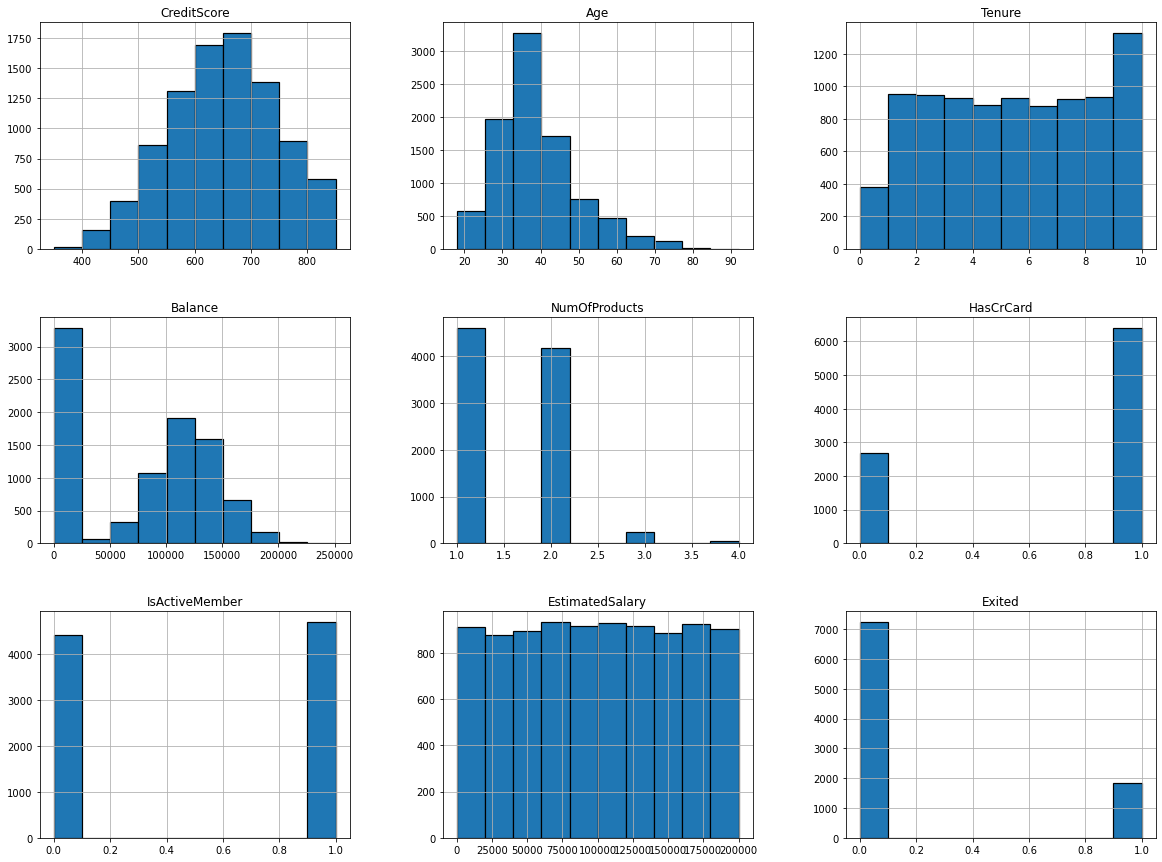

In [345]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20,15));

## violin plots

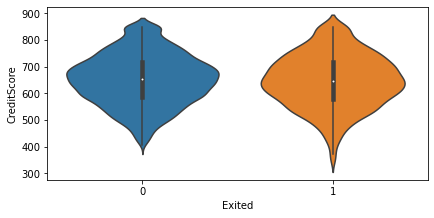

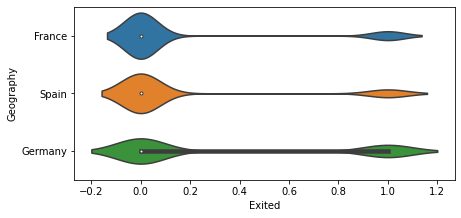

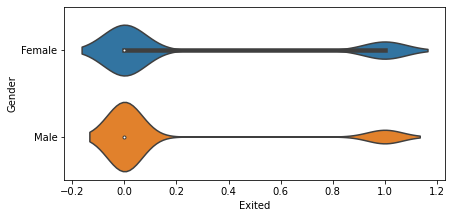

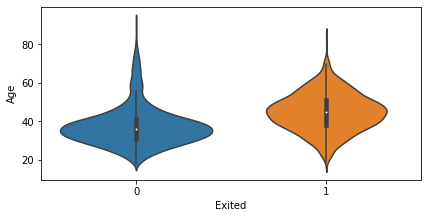

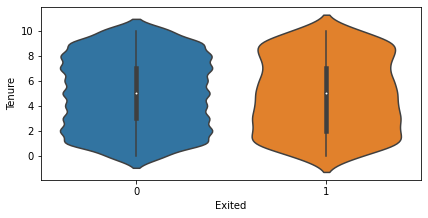

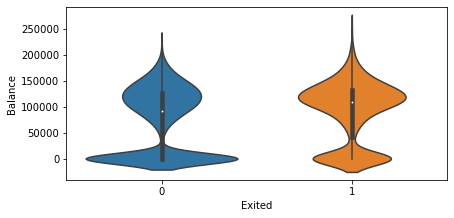

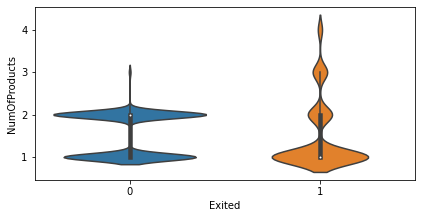

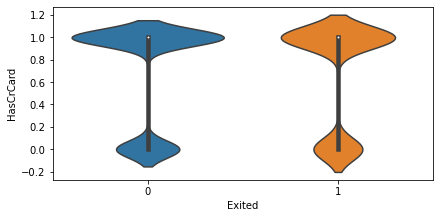

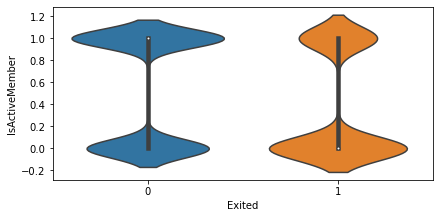

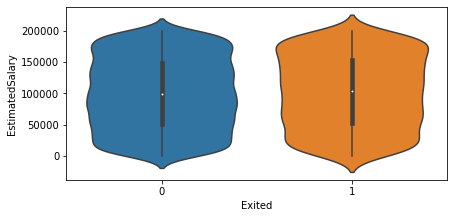

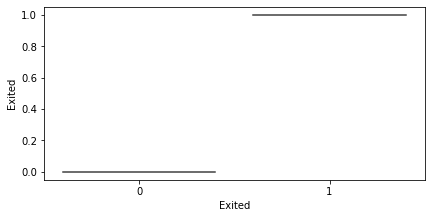

In [346]:
for column in data.columns:
    plt.figure(figsize=(15,7))
    plt.subplot(2,2,1)
    sns.violinplot(x='Exited', y=column, data=data);

if i had to guess by these graphs, i'd say the Age, Balance, and NumOfProducts affect the exited column the most.

## correlation heatmap

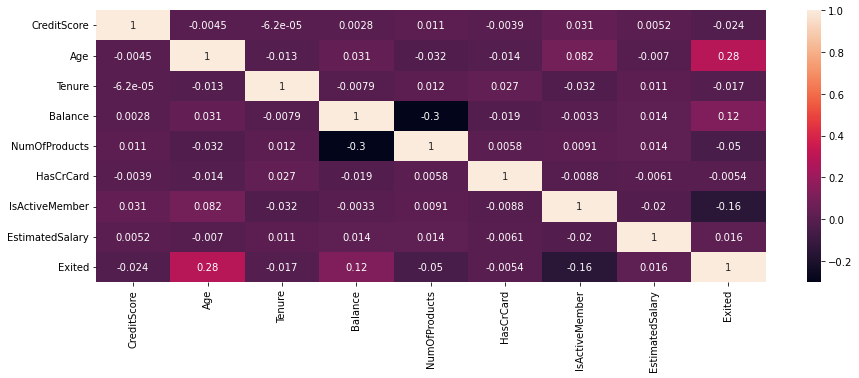

In [347]:
plt.figure(figsize=(15,5))
ax = sns.heatmap(data.corr(), annot=True)

according to the heatmap of the correlation matrix, top 3 are Age, CreditScore, and IsActiveMember. runner up is balance.
so that could mean these are what affect exit percentage the most.

# Train the model without taking into account the imbalance.

## Decision Tree

In [23]:

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train_ohe, target_train_ohe)
predicted_valid = model.predict(features_valid_ohe)


print(f1_score(target_valid_ohe, predicted_valid))

0.4788732394366197


let's try tuning the hyperparameters

In [24]:
for depth in range(1,14):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_ohe,target_train_ohe)
    predicted_valid = model.predict(features_valid_ohe)
    result = f1_score(target_valid_ohe, predicted_valid)
    print(f'max_depth = {depth} : {result}')

max_depth = 1 : 0.0
max_depth = 2 : 0.4938704028021015
max_depth = 3 : 0.4964539007092199
max_depth = 4 : 0.49056603773584917
max_depth = 5 : 0.5418894830659536
max_depth = 6 : 0.5474060822898033
max_depth = 7 : 0.56195462478185
max_depth = 8 : 0.5388601036269429
max_depth = 9 : 0.5337837837837839
max_depth = 10 : 0.5133333333333334
max_depth = 11 : 0.5121951219512195
max_depth = 12 : 0.49689440993788814
max_depth = 13 : 0.4926253687315634


In [29]:
model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_train_ohe,target_train_ohe)
probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f' auc-roc is {auc_roc}')

 auc-roc is 0.8397405769479859


we got a low f1 score. we're trying to get 0.59, let's try other models

## Random Forest

In [31]:
best_score = 0
best_est = 0
for est in range(1, 11): 
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # set number of trees
    model.fit(features_train_ohe,target_train_ohe) # train model on training set
    predicted_valid = model.predict(features_valid_ohe) # get the model's predictions
    score = f1_score(target_valid_ohe, predicted_valid) # calculate f1 score on validation set
    if score > best_score:
        best_score = score # save best f1 score on validation set
        best_est = est # save number of estimators corresponding to best f1 score

print("f1 score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

f1 score of the best model on the validation set (n_estimators = 7): 0.5492063492063491


In [32]:
model = RandomForestClassifier(random_state=12345, n_estimators=9)
model.fit(features_train_ohe,target_train_ohe)
probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f' auc-roc is {auc_roc}')

 auc-roc is 0.8312667690542717


## Logistic Regression

In [33]:
model = LogisticRegression(random_state=12345, solver='lbfgs')
model.fit(features_train_ohe, target_train_ohe)
predicted_valid = model.predict(features_valid_ohe)
print("F1:", f1_score(target_valid_ohe, predicted_valid))

F1: 0.33466135458167334


In [34]:
model.fit(features_train_ohe,target_train_ohe)
probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f' auc-roc is {auc_roc}')

 auc-roc is 0.7866199137723664


so our best try was 
tree classifer with 0.56 f1 score, let's try balancing the classes as well.

# improving the quality of the model:

## changing the class_weight parameter

### Decision Tree

In [35]:
for depth in range(1,14):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight = 'balanced')
    model.fit(features_train_ohe,target_train_ohe)
    predicted_valid = model.predict(features_valid_ohe) 
    result = f1_score(target_valid_ohe, predicted_valid)
    print(f'max_depth = {depth} : {result}')

max_depth = 1 : 0.4973544973544974
max_depth = 2 : 0.5165289256198347
max_depth = 3 : 0.5165289256198347
max_depth = 4 : 0.54341164453524
max_depth = 5 : 0.532520325203252
max_depth = 6 : 0.5508735868448098
max_depth = 7 : 0.5333333333333334
max_depth = 8 : 0.5541899441340783
max_depth = 9 : 0.5382882882882882
max_depth = 10 : 0.5325842696629213
max_depth = 11 : 0.5306122448979592
max_depth = 12 : 0.5123762376237624
max_depth = 13 : 0.5012468827930174


still only 0.55 f1-score

In [36]:
model = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight = 'balanced')
model.fit(features_train_ohe,target_train_ohe)
probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f' auc-roc is {auc_roc}')

 auc-roc is 0.8448457709601612


### Random Forest

In [38]:
best_score = 0
best_est = 0
for est in range(1, 11): 
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced') 
    model.fit(features_train_ohe,target_train_ohe) 
    predicted_valid = model.predict(features_valid_ohe)
    score = f1_score(target_valid_ohe, predicted_valid)
    if score > best_score:
        best_score = score 
        best_est = est 

print("f1 score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

f1 score of the best model on the validation set (n_estimators = 9): 0.5196078431372549


In [39]:
model = RandomForestClassifier(random_state=12345, n_estimators=9, class_weight='balanced') 
model.fit(features_train_ohe,target_train_ohe)
probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f' auc-roc is {auc_roc}')

 auc-roc is 0.8363109005791685


### Logisitic Regression

In [40]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train_ohe, target_train_ohe)
predicted_valid = model.predict(features_valid_ohe)
print('F1:', f1_score(target_valid_ohe, predicted_valid))

F1: 0.5100671140939598


In [41]:
model.fit(features_train_ohe,target_train_ohe)
probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f' auc-roc is {auc_roc}')

 auc-roc is 0.7880743111966397


adjusting the weight class parameter didn't help.

## Upsampling

let's upsample

In [81]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train_ohe, target_train_ohe, 4
)

target_upsampled.value_counts()

1    4448
0    4342
Name: Exited, dtype: int64

In [82]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid_ohe)


print('F1:', f1_score(target_valid_ohe, predicted_valid))

probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f'auc-roc: {auc_roc}')

F1: 0.5075471698113208
auc-roc: 0.7880965157374682


In [83]:
best_score = 0
best_est = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=54321, n_estimators=est) 
    model.fit(features_upsampled,target_upsampled)
    predicted_valid = model.predict(features_valid_ohe)
    score = f1_score(target_valid_ohe, predicted_valid)
    if score > best_score:
        best_score = score 
        best_est = est 

print("f1 score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))


f1 score of the best model on the validation set (n_estimators = 5): 0.5623268698060943


In [84]:
probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f'auc-roc: {auc_roc}')

auc-roc: 0.8333382676757397


In [85]:
for depth in range(1,14):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled,target_upsampled)
    predicted_valid = model.predict(features_valid_ohe) 
    result = f1_score(target_valid_ohe, predicted_valid)
    print(f'max_depth = {depth} : {result}')

max_depth = 1 : 0.4973544973544974
max_depth = 2 : 0.5165289256198347
max_depth = 3 : 0.5165289256198347
max_depth = 4 : 0.54341164453524
max_depth = 5 : 0.532520325203252
max_depth = 6 : 0.551440329218107
max_depth = 7 : 0.5338725985844287
max_depth = 8 : 0.5582959641255605
max_depth = 9 : 0.5413363533408833
max_depth = 10 : 0.5348314606741573
max_depth = 11 : 0.5379975874547647
max_depth = 12 : 0.5049261083743843
max_depth = 13 : 0.5087281795511223


not that much closer, 0.558 f1 score

## Downsampling

let's try downsampling

In [86]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train_ohe, target_train_ohe, 0.256
)
target_downsampled.value_counts()

0    1112
1    1112
Name: Exited, dtype: int64

In [87]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid_ohe)

print('F1:', f1_score(target_valid_ohe, predicted_valid))

F1: 0.5080875356803044


In [88]:
probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f'auc-roc: {auc_roc}')

auc-roc: 0.7894713468904392


In [89]:
best_score = 0
best_est = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=54321, n_estimators=est)
    model.fit(features_downsampled,target_downsampled)
    predicted_valid = model.predict(features_valid_ohe)
    score = f1_score(target_valid_ohe, predicted_valid)
    if score > best_score:
        best_score = score 
        best_est = est 

print("f1 score of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))

f1 score of the best model on the validation set (n_estimators = 10): 0.5610561056105611


so far our best model is RFC with n_est = 10 with and f1_score of 0.56


let's check if a DTC model can do better:

In [71]:
for depth in range(1,14):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled,target_downsampled)
    predicted_valid = model.predict(features_valid_ohe)
    result = f1_score(target_valid_ohe, predicted_valid)
    print(f'max_depth = {depth} : {result}')

max_depth = 1 : 0.49774774774774777
max_depth = 2 : 0.5191675794085433
max_depth = 3 : 0.5191675794085433
max_depth = 4 : 0.5570971184631804
max_depth = 5 : 0.5417057169634488
max_depth = 6 : 0.5336134453781514
max_depth = 7 : 0.521920668058455
max_depth = 8 : 0.5412262156448202
max_depth = 9 : 0.5339074273412272
max_depth = 10 : 0.5206611570247933
max_depth = 11 : 0.5056065239551478
max_depth = 12 : 0.49706457925636005
max_depth = 13 : 0.49900990099009906


In [72]:
model = DecisionTreeClassifier(random_state=12345, max_depth=4)
model.fit(features_downsampled,target_downsampled)

probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(f'auc-roc: {auc_roc}')

auc-roc: 0.8240447421497695


nope! going with the RFC model.

# Final testing

In [76]:
model = RandomForestClassifier(random_state=12345, n_estimators=8)
model.fit(features_upsampled,target_upsampled) 
predicted_test = model.predict(features_test_ohe) 
score = f1_score(target_test_ohe, predicted_test) 
print(f' f1 score is {score}')

 f1 score is 0.6043795620437956


finally we've achieved the desired result! let's compare the f1 score with auc-roc metric either way.

In [90]:
probabilities_test = model.predict_proba(features_test_ohe)
probabilities_one_test = probabilities_test[:, 1]

auc_roc = roc_auc_score(target_test_ohe, probabilities_one_test)

print(auc_roc)

0.8279555169032067


the auc-roc is greater than 0.5 which means the model is better than a random model.
also note that the auc-roc metric hasn't fluctuated much throughout the project.